In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import etfs as et

/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/akuepper/anaconda/envs/etfs_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
from etfs.security.io import read_yahoo_csv, retrieve_yahoo_quote, get_company_name
from etfs.stats.basics import resample_df, runrate_column, shift_column, returns_column, \
                              difference, rsq, beta, alpha, standard_deviation_column
from etfs.utils.helpers import todays_date
from etfs.visualization.trends import plot_trend, plot_candlestick, plot_ewm
from etfs.treasury.io import retrieve_treasury_yield_curve_rates

## Open connection to Robinhood account

In [5]:
import robin_stocks as r
from etfs.portfolio.io import import_portfolio_robinhood

In [6]:
# access password file
f = open("../../../.etfs.txt","r")
lines = f.readlines()
username = lines[0].strip().split('\n', 0)
password = lines[1].strip().split('\n', 0)
f.close()

In [7]:
access_token = r.login(username, password)

Please Type In The MFA Code: 510778


In [224]:
rh = import_portfolio_robinhood(access_token=access_token, 
                                username=username, 
                                password=password, 
                                name="Robinhood", 
                                free_stock=True)

Please Type In The MFA Code: 812687
Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Parsing orders ...
Parsing bank transfers ...
Parsing dividends ...
Adding promotional stock ...
depositing 550.00 USD (new balance: 550.00 USD)
Checking ../data/MSFT.csv
Saving ../data/MSFT.csv
Checking ../data/MSFT.csv
Saving ../data/MSFT.csv
buying 1.00 MSFT (new balance: 455.88 USD)
buying 1.00 MSFT (new balance: 361.52 USD)
Checking ../data/AAPL.csv
Saving ../data/AAPL.csv
Checking ../data/AAPL.csv
Saving ../data/AAPL.csv
buying 1.00 AAPL (new balance: 193.84 USD)
Checking ../data/BABA.csv
Saving ../data/BABA.csv
Checking ../data/BABA.csv
Saving ../data/BABA.csv
buying 1.00 BABA (new balance: 0.50 USD)
Checking ../data/CHK.csv
Saving ../data/CHK.csv
Checking ../data/CHK.csv
Saving ../data/CHK.csv
buying 1.00 CHK (new balance: 0.50 USD)
dividend AAPL 0.6

Saving ../data/NTDOY.csv
Checking ../data/NTDOY.csv
Saving ../data/NTDOY.csv
buying 1.00 NTDOY (new balance: 67.93 USD)
buying 5.00 NIO (new balance: 35.29 USD)
Checking ../data/CVS.csv
Saving ../data/CVS.csv
Checking ../data/CVS.csv
Saving ../data/CVS.csv
buying 1.00 CVS (new balance: -30.73 USD)
selling 2.00 IQ (new balance: 5.55 USD)
buying 4.00 NIO (new balance: -20.71 USD)
buying 9.00 NTDOY (new balance: -333.42 USD)
selling 1.00 NFLX (new balance: 3.58 USD)
buying 2.00 ZTO (new balance: -30.88 USD)
selling 3.00 SONO (new balance: 2.90 USD)
depositing 1000.00 USD (new balance: 1002.89 USD)
buying 1.00 CVS (new balance: 939.36 USD)
buying 5.00 CVS (new balance: 621.51 USD)
buying 5.00 CVS (new balance: 301.46 USD)
buying 1.00 UNH (new balance: 50.60 USD)
buying 45.00 NIO (new balance: -253.07 USD)
selling 1.00 UNH (new balance: 6.60 USD)
selling 1.00 NTDOY (new balance: 44.88 USD)
selling 1.00 SQ (new balance: 116.30 USD)
Checking ../data/CRSP.csv
Saving ../data/CRSP.csv
Checking .

Checking ../data/MOMO.csv
Saving ../data/MOMO.csv
Checking ../data/MOMO.csv
Saving ../data/MOMO.csv
buying 28.00 MOMO (new balance: -1044.00 USD)
selling 6.00 BABA (new balance: 30.90 USD)
buying 2.00 HUYA (new balance: -20.01 USD)
buying 2.00 HUYA (new balance: -70.75 USD)
selling 2.00 TCEHY (new balance: 25.41 USD)
dividend ZTO 7.59 USD (new balance: 32.98 USD)
buying 5.00 HUYA (new balance: -88.49 USD)
selling 1.00 OKTA (new balance: 3.61 USD)
buying 16.00 NIO (new balance: -76.38 USD)
buying 4.00 HUYA (new balance: -168.33 USD)
selling 7.00 SONO (new balance: -86.57 USD)
selling 1.00 FTNT (new balance: 3.03 USD)
buying 1.00 MOMO (new balance: -33.84 USD)
selling 3.00 ZTO (new balance: 23.55 USD)
buying 3.00 HUYA (new balance: -44.89 USD)
buying 21.00 NIO (new balance: -139.81 USD)
selling 2.00 CRSP (new balance: -61.33 USD)
selling 1.00 AYX (new balance: 23.44 USD)
buying 2.00 CRSP (new balance: -49.57 USD)
buying 3.00 HUYA (new balance: -116.78 USD)
buying 2.00 HUYA (new balance: 

Checking ../data/JMIA.csv
Saving ../data/JMIA.csv
Checking ../data/JMIA.csv
Saving ../data/JMIA.csv
buying 1.00 JMIA (new balance: 156.72 USD)
buying 3.00 JMIA (new balance: 85.07 USD)
Checking ../data/ZM.csv
Saving ../data/ZM.csv
Checking ../data/ZM.csv
Saving ../data/ZM.csv
buying 11.00 ZM (new balance: -1009.22 USD)
buying 42.00 JMIA (new balance: -2052.92 USD)
selling 4.00 SNAP (new balance: -1995.96 USD)
selling 58.00 ZTO (new balance: -939.79 USD)
selling 39.00 JD (new balance: 131.55 USD)
buying 2.00 MOMO (new balance: 69.58 USD)
buying 3.00 IQ (new balance: 16.42 USD)
selling 2.00 SONO (new balance: 40.13 USD)
buying 6.00 FB (new balance: -1068.27 USD)
buying 6.00 FB (new balance: -2181.15 USD)
buying 11.00 FB (new balance: -4219.58 USD)
dividend TCEHY 2.47 USD (new balance: -4217.11 USD)
selling 15.00 SQ (new balance: -3135.91 USD)
selling 28.00 EBAY (new balance: -2049.82 USD)
selling 90.00 SONO (new balance: -1010.17 USD)
selling 9.00 BIDU (new balance: 7.06 USD)
buying 1.00

buying 15.00 SONO (new balance: -2087.07 USD)
selling 1.00 FB (new balance: -1886.00 USD)
selling 1.00 JMIA (new balance: -1863.71 USD)
selling 1.00 TCEHY (new balance: -1817.64 USD)
selling 1.00 FTNT (new balance: -1729.19 USD)
selling 1.00 LYFT (new balance: -1662.56 USD)
selling 1.00 MOMO (new balance: -1627.28 USD)
selling 1.00 AYX (new balance: -1509.95 USD)
selling 1.00 WORK (new balance: -1477.59 USD)
selling 1.00 ZM (new balance: -1380.93 USD)
selling 1.00 MOMO (new balance: -1345.68 USD)
selling 1.00 GOOG (new balance: -196.15 USD)
selling 2.00 HUYA (new balance: -151.60 USD)
selling 2.00 JMIA (new balance: -107.18 USD)
selling 2.00 MOMO (new balance: -36.80 USD)
selling 3.00 SNAP (new balance: 6.80 USD)
buying 3.00 EBAY (new balance: -115.11 USD)
buying 1.00 HUYA (new balance: -136.50 USD)
buying 2.00 OSTK (new balance: -170.90 USD)
selling 1.00 WORK (new balance: -138.25 USD)
selling 1.00 ZEN (new balance: -44.85 USD)
selling 1.00 EVER (new balance: -30.40 USD)
selling 1.00 

selling 2.00 JMIA (new balance: -187.92 USD)
selling 2.00 SONO (new balance: -167.52 USD)
selling 1.00 MELI (new balance: 503.17 USD)
selling 1.00 ZM (new balance: 597.34 USD)
buying 1.00 NIO (new balance: 594.19 USD)
buying 1.00 JD (new balance: 567.07 USD)
buying 1.00 NIO (new balance: 563.90 USD)
buying 7.00 NIO (new balance: 541.72 USD)
buying 3.00 JD (new balance: 460.30 USD)
buying 32.00 JD (new balance: -408.81 USD)
buying 30.00 NIO (new balance: -503.01 USD)
buying 31.00 NIO (new balance: -600.04 USD)
buying 52.00 NIO (new balance: -763.32 USD)
buying 186.00 NIO (new balance: -1348.81 USD)
buying 6.00 JMIA (new balance: -1424.11 USD)
selling 1.00 EVER (new balance: -1403.96 USD)
selling 2.00 SONO (new balance: -1380.88 USD)
selling 1.00 MOMO (new balance: -1349.15 USD)
selling 1.00 SNAP (new balance: -1332.17 USD)
selling 1.00 AYX (new balance: -1199.15 USD)
selling 15.00 LYFT (new balance: -315.01 USD)
selling 1.00 CRWD (new balance: -220.33 USD)
selling 1.00 EVER (new balance

## Get price history of a single stock

In [40]:
AAPL = et.Security('AAPL', start='2017-01-01')

Checking ../data/AAPL.csv
Saving ../data/AAPL.csv


In [41]:
AAPL.get_last_price()

210.3500061035156

In [8]:
r.get_latest_price(['AAPL'])

['201.800000']

## Exponential moving average price

In [43]:
from etfs.visualization.trends import plot_trend, plot_ewm

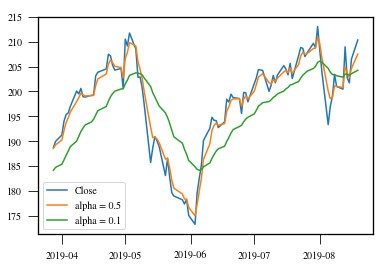

In [44]:
plot_ewm(security=AAPL, alphas=[.5, .1], ndays=100)

In [46]:
AAPL.last_price_ewm01 = AAPL.data["Close_ewm0.1_mean"].values[-1]
AAPL.last_price_ewm05 = AAPL.data["Close_ewm0.5_mean"].values[-1]
AAPL.last_price_ewm01, AAPL.last_price_ewm05

(204.2543476203273, 207.493605410854)

## Exponential moving average standard deviation

In [47]:
AAPL.data["Deviation_ewm0.1"] = AAPL.data["Close"] - AAPL.last_price_ewm01
AAPL.data["Deviation_ewm0.5"] = AAPL.data["Close"] - AAPL.last_price_ewm05

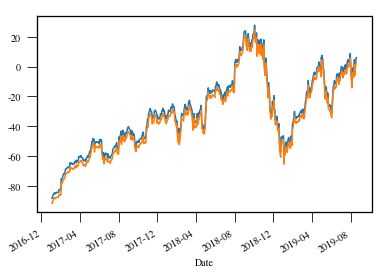

In [48]:
AAPL.data["Deviation_ewm0.1"].plot()
AAPL.data["Deviation_ewm0.5"].plot()

In [49]:
AAPL.data["Squared_Deviation_ewm0.1"] = np.square(AAPL.data["Deviation_ewm0.1"])
AAPL.data["Squared_Deviation_ewm0.5"] = np.square(AAPL.data["Deviation_ewm0.5"])

In [51]:
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Squared_Deviation_ewm0.1", alpha=0.1)
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Squared_Deviation_ewm0.5", alpha=0.5)

In [53]:
AAPL.data["Standard_deviation_ewm0.5"] = np.sqrt(AAPL.data["Squared_Deviation_ewm0.5_ewm0.5_mean"])
AAPL.data["Standard_deviation_ewm0.1"] = np.sqrt(AAPL.data["Squared_Deviation_ewm0.1_ewm0.1_mean"])

In [54]:
AAPL.last_standard_deviation_ewm01 = AAPL.data["Standard_deviation_ewm0.1"].values[-1]
AAPL.last_standard_deviation_ewm05 = AAPL.data["Standard_deviation_ewm0.5"].values[-1]
AAPL.last_standard_deviation_ewm01, AAPL.last_standard_deviation_ewm05

(4.829596840740295, 3.384130665251166)

AttributeError: 'Security' object has no attribute 'last_price_ewm'

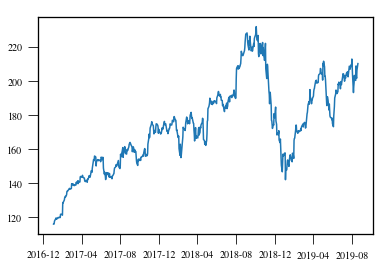

In [55]:
plt.plot(AAPL.data.Close)
plt.hlines(AAPL.last_price_ewm, xmin=min(AAPL.data.index), xmax=max(AAPL.data.index))
plt.hlines(AAPL.last_price_ewm01-2*AAPL.last_standard_deviation_ewm01, xmin=min(AAPL.data.index), xmax=max(AAPL.data.index), linestyle=':')
plt.xlim(AAPL.data.index[-20], AAPL.data.index[-1])

(180, 220)

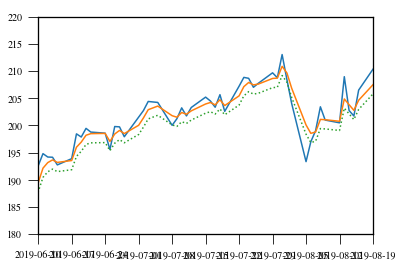

In [73]:
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.5_mean"])
plt.plot(AAPL.data["Close_ewm0.5_mean"]-0.5*AAPL.last_standard_deviation_ewm05, linestyle=':')
plt.xlim(AAPL.data.index[-50], AAPL.data.index[-1])
plt.ylim(180, 220)

(160, 220)

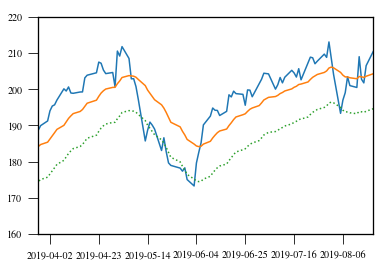

In [63]:
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.1_mean"])
plt.plot(AAPL.data["Close_ewm0.1_mean"]-2*AAPL.last_standard_deviation_ewm01, linestyle=':')
plt.xlim(AAPL.data.index[-100], AAPL.data.index[-1])
plt.ylim(160, 220)

## Pandas way of calculating the exponentially weighted standard deviation

In [59]:
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Close", alpha=0.1, func='std')
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Close", alpha=0.5, func='std')

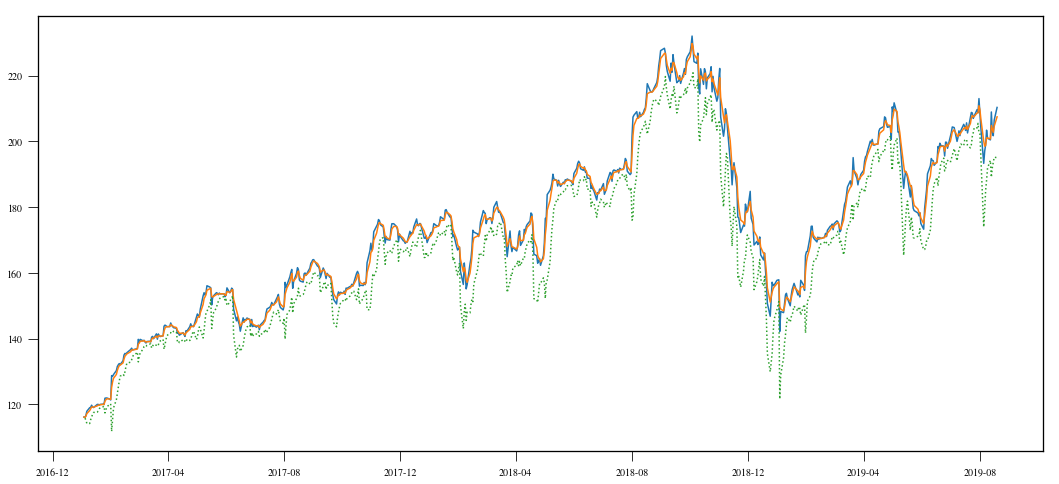

In [85]:
plt.figure(figsize=(18,8))
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.5_mean"])
plt.plot(AAPL.data["Close_ewm0.5_mean"]-3*AAPL.data["Close_ewm0.5_std"], linestyle=':')
#plt.xlim(AAPL.data.index[-30], AAPL.data.index[-1])
#plt.ylim(160, 220)


In [71]:
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Close", alpha=0.1, func='var')
AAPL.data, _ = et.stats.basics.ewm_column(AAPL.data, column="Close", alpha=0.5, func='var')

(160, 220)

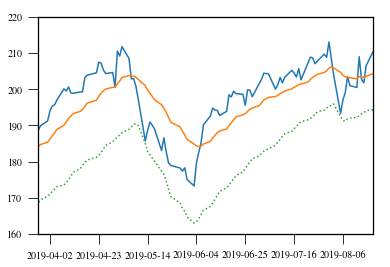

In [72]:
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.1_mean"])
plt.plot(AAPL.data["Close_ewm0.1_mean"]-2*np.sqrt(AAPL.data["Close_ewm0.1_var"]), linestyle=':')
plt.xlim(AAPL.data.index[-100], AAPL.data.index[-1])
plt.ylim(160, 220)

## Generate stop loss price for security

In [111]:
from etfs.stats.basics import ewm_column

In [225]:
def get_stop_loss_price(security=None, column="Close", alpha=.5, sigmas=2):
    """
    Return a price that can be used as stop loss signal
    """

    if security:
        # add a column with exponential moving average of price column
        _df, _column_ewm = ewm_column(security.data, column=column, alpha=alpha)
        _columns = _df.columns
        
        # get the latest exponentially weighted averaged price
        security.last_price_ewm = _df[_column_ewm].values[-1]
        _df["Deviation_ewm"] = _df[column] - security.last_price_ewm
        
        # calculate standard deviation
        _df["Squared_Deviation_ewm"] = np.square(_df["Deviation_ewm"])
        _df, _column_ewm2 = ewm_column(_df, column="Squared_Deviation_ewm", alpha=alpha)
        _df["Standard_deviation_ewm"] = np.sqrt(_df[_column_ewm2])

        # get the latest exponentially weighted average standard deviation
        security.last_standard_deviation_ewm = _df["Standard_deviation_ewm"].values[-1]
        
        price = security.last_price_ewm - sigmas*security.last_standard_deviation_ewm
    else:
        price = 0.0
    
    return price

In [151]:
AAPL.stop_loss_price = get_stop_loss_price(security=AAPL, column="Close", ndays=100, alpha=.5, sigmas=2)
AAPL.stop_loss_price

199.5043182456854

(737145.0, 737287.0)

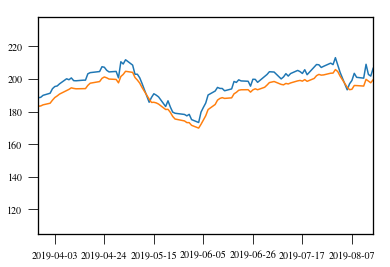

In [154]:
plt.plot(AAPL.data.Close)
plt.plot(AAPL.data["Close_ewm0.5"]-2*AAPL.last_standard_deviation_ewm)
plt.xlim(AAPL.data.index[-100], AAPL.data.index[-1])

In [123]:
AAPL.last_price_ewm, AAPL.last_standard_deviation_ewm

(204.6372047181924, 2.5664432362535057)

In [ ]:
r.orders.order_sell_stop_loss(symbol=AAPL.ticker, quantity, stopPrice, timeInForce='gtc')[source]

In [266]:
rh.positions()

Checking ../data/CVS.csv
Saving ../data/CVS.csv
Checking ../data/BND.csv
Saving ../data/BND.csv
Checking ../data/SFTBY.csv
Saving ../data/SFTBY.csv
Checking ../data/DB.csv
Saving ../data/DB.csv
Checking ../data/BIDU.csv
Saving ../data/BIDU.csv
Checking ../data/AMD.csv
Saving ../data/AMD.csv
Checking ../data/NVDA.csv
Saving ../data/NVDA.csv
Checking ../data/WDAY.csv
Saving ../data/WDAY.csv
Checking ../data/MSFT.csv
Saving ../data/MSFT.csv
Checking ../data/FB.csv
Saving ../data/FB.csv
Checking ../data/BABA.csv
Saving ../data/BABA.csv
Checking ../data/TSM.csv
Saving ../data/TSM.csv
Checking ../data/AAPL.csv
Saving ../data/AAPL.csv
Checking ../data/TSLA.csv
Saving ../data/TSLA.csv
Checking ../data/IQ.csv
Saving ../data/IQ.csv
Checking ../data/ZEN.csv
Saving ../data/ZEN.csv
Checking ../data/ZTO.csv
Saving ../data/ZTO.csv
Checking ../data/LYFT.csv
Saving ../data/LYFT.csv
Checking ../data/NFLX.csv
Saving ../data/NFLX.csv
Checking ../data/W.csv
Saving ../data/W.csv
Checking ../data/GOOG.csv
Sa

In [264]:
import time

In [265]:
r.cancel_all_open_orders()
positions_data = r.get_current_positions()
for ticker in rh.tickers:
    stock_data = [item for item in positions_data if
                  r.get_name_by_url(item['instrument']) == r.get_name_by_symbol(ticker)][0]
    if (rh.positions_df.Quantity[ticker] > 0) & (rh.positions_df.Quantity[ticker] == float(stock_data['quantity'])):
        _latest_price = float(r.get_latest_price([ticker])[0])
        _stop_loss_price = round(get_stop_loss_price(security=rh.securities[ticker], column="Close", ndays=100, alpha=.5, sigmas=2),2)
        _latest_price_ewm = rh.securities[ticker].last_price_ewm
        quantity = float(stock_data['quantity'])
        print(ticker, 
              quantity,
              _latest_price, 
              _latest_price_ewm, 
              _stop_loss_price, 
              _stop_loss_price - _latest_price,
              100*(_stop_loss_price - _latest_price)/_latest_price
             )
        r.order_sell_stop_loss(ticker,quantity,_stop_loss_price)
        time.sleep(5)
    else:
        print(rh.positions_df.Quantity[ticker], float(stock_data['quantity']))
        
    

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
All Orders Cancelled
TCEHY 21.0 41.885 41.97473762745699 40.98 -0.9050000000000011 -2.160678047033547
UNH 4.0 245.06 245.23440121282584 242.23 -2.8300000000000125 -1.154819227944182
CRSP 19.0 47.55 47.10575940846472 45.4 -2.1499999999999986 -4.521556256572027
HUYA 38.0 24.28 23.222691589427214 20.61 -3.6700000000000017 -15.115321252059314
OKTA 7.0 128.18 128.37257852275832 124.79 -3.3900000000000006 -2.644718364799501
FTNT 11.0 80.66 80.85959506870458 78.83 -1.8299999999999983 -2.2687825440119
MELI 1.0 624.53 623.3121159588849 599.11 -25.41999999999996 -4.070260836148777
MOMO 28.0 33.25 32.43416469530579 30.95 -2.3000000000000007 -6.917293233082709
SNAP 57.0 15.91 16.14313784352015 15.51 -0.40000000000000036 -2.514142049025772
JMIA 72.0 13.07 13.038116989746296 12.34 -0.7300000000000004 -5.585

In [255]:
round(_stop_loss_price,2)

40.98

In [235]:
r.order_sell_stop_loss(symbol='TCEHY', quantity=21, stopPrice=_stop_loss_price)

400 Client Error: Bad Request for url: https://api.robinhood.com/orders/


In [ ]:
symbol=ticker, 
                                      quantity=rh.positions_df.Quantity[ticker], 
                                      stopPrice=_stop_loss_price, 
                                      timeInForce='gtc'

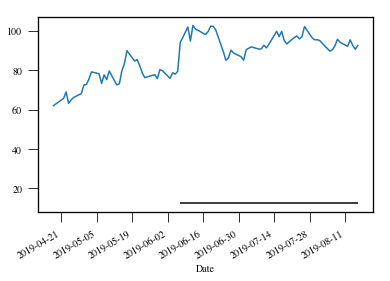

In [259]:
rh.securities['ZM'].data.Close.plot()
plt.hlines(12.341712985702028, xmin=rh.securities['JMIA'].data.index[-50], xmax=rh.securities['JMIA'].data.index[-1])

In [220]:
rh.tickers[0:1]

['TCEHY']

In [236]:
positions_data = r.get_current_positions()

In [237]:
positions_data

[{'shares_held_for_stock_grants': '0.0000',
  'account': 'https://api.robinhood.com/accounts/5UD70030/',
  'pending_average_buy_price': '108.9095',
  'shares_held_for_options_events': '0.0000',
  'intraday_average_buy_price': '0.0000',
  'url': 'https://api.robinhood.com/positions/5UD70030/f69573b8-d80a-4df9-9c36-4fdd2be5c70f/',
  'shares_held_for_options_collateral': '0.0000',
  'created_at': '2019-01-25T19:20:02.236469Z',
  'updated_at': '2019-08-18T03:54:11.147828Z',
  'shares_held_for_buys': '0.0000',
  'average_buy_price': '108.9095',
  'instrument': 'https://api.robinhood.com/instruments/f69573b8-d80a-4df9-9c36-4fdd2be5c70f/',
  'intraday_quantity': '0.0000',
  'shares_held_for_sells': '0.0000',
  'shares_pending_from_options_events': '0.0000',
  'quantity': '7.0000'},
 {'shares_held_for_stock_grants': '0.0000',
  'account': 'https://api.robinhood.com/accounts/5UD70030/',
  'pending_average_buy_price': '193.2185',
  'shares_held_for_options_events': '0.0000',
  'intraday_average_

In [260]:
stock_data = [item for item in positions_data if
              r.get_name_by_url(item['instrument']) == r.get_name_by_symbol('ZM')][0]

In [261]:
stock_data

{'shares_held_for_stock_grants': '0.0000',
 'account': 'https://api.robinhood.com/accounts/5UD70030/',
 'pending_average_buy_price': '95.6447',
 'shares_held_for_options_events': '0.0000',
 'intraday_average_buy_price': '0.0000',
 'url': 'https://api.robinhood.com/positions/5UD70030/35875944-ffb7-47eb-a2e5-582ba9f26a8d/',
 'shares_held_for_options_collateral': '0.0000',
 'created_at': '2019-06-13T14:39:20.362323Z',
 'updated_at': '2019-08-08T14:42:54.042560Z',
 'shares_held_for_buys': '0.0000',
 'average_buy_price': '95.6447',
 'instrument': 'https://api.robinhood.com/instruments/35875944-ffb7-47eb-a2e5-582ba9f26a8d/',
 'intraday_quantity': '0.0000',
 'shares_held_for_sells': '0.0000',
 'shares_pending_from_options_events': '0.0000',
 'quantity': '10.0000'}

In [262]:
sellQuantity = float(stock_data['quantity'])

In [263]:
sellQuantity

10.0

In [252]:
r.order_sell_stop_loss('ZM',sellQuantity,10.00)

{'updated_at': '2019-08-18T21:49:39.650718Z',
 'ref_id': None,
 'time_in_force': 'gtc',
 'last_trail_price': None,
 'fees': '0.00',
 'cancel': 'https://api.robinhood.com/orders/99adc496-c886-4448-9958-6afe28e20b34/cancel/',
 'response_category': None,
 'id': '99adc496-c886-4448-9958-6afe28e20b34',
 'cumulative_quantity': '0.00000',
 'stop_price': '10.00000000',
 'reject_reason': None,
 'instrument': 'https://api.robinhood.com/instruments/ffb40d09-3a49-4e9d-94f6-010c2778d473/',
 'state': 'unconfirmed',
 'trigger': 'stop',
 'override_dtbp_checks': False,
 'last_trail_price_updated_at': None,
 'type': 'market',
 'last_transaction_at': '2019-08-18T21:49:39.632808Z',
 'price': '10.00000000',
 'executions': [],
 'extended_hours': False,
 'account': 'https://api.robinhood.com/accounts/5UD70030/',
 'stop_triggered_at': None,
 'url': 'https://api.robinhood.com/orders/99adc496-c886-4448-9958-6afe28e20b34/',
 'created_at': '2019-08-18T21:49:39.632808Z',
 'side': 'sell',
 'override_day_trade_check

In [254]:
r.cancel_all_open_orders()

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
All Orders Cancelled


[]

## Rebalance

In [24]:
allTransactions = r.get_bank_transfers()

deposits = sum(float(x['amount']) for x in allTransactions if (x['direction'] == 'deposit') and (x['state'] == 'completed'))
withdrawals = sum(float(x['amount']) for x in allTransactions if (x['direction'] == 'withdraw') and (x['state'] == 'completed'))
money_invested = deposits - withdrawals

In [25]:
profileData = r.load_portfolio_profile()

In [26]:
current_balance = float(profileData['extended_hours_equity'])

In [28]:
current_balance, money_invested, 100*(current_balance/money_invested-1)

(24580.5937, 23560.0, 4.3318917657045874)

In [68]:
holdings = r.build_holdings()

In [69]:
positions_data = r.get_current_positions()

In [70]:
positions = len(holdings)
mean_volume = current_balance/positions

In [71]:
print(positions, mean_volume)

25 983.223748


In [72]:
# get stock data from Robinhood API

# build a dataframe
Ticker = []
Quantity = []
Price = []
Volume = []
Delta = []
NDelta = []

for ticker in holdings:
    stock_data = [item for item in positions_data if
              r.get_name_by_url(item['instrument']) == r.get_name_by_symbol(ticker)][0]
    quantity = float(stock_data['quantity'])
    price = float(r.get_latest_price([ticker])[0])
    volume = quantity*price
    delta = volume-mean_volume
    ndelta = delta/price
    print(ticker, 
          quantity, 
          price,
          quantity*price,
          delta,
          ndelta
         )
    Ticker.append(ticker)
    Quantity.append(quantity)
    Price.append(price)
    Volume.append(volume)
    Delta.append(delta)
    NDelta.append(ndelta)

AYX 7.0 138.56 969.9200000000001 -13.303747999999928 -0.09601434757505721
BYND 7.0 145.75 1020.25 37.026252 0.25403946483704976
CRSP 21.0 46.63 979.23 -3.9937479999999823 -0.08564760883551323
EVER 45.0 22.4 1007.9999999999999 24.776251999999886 1.1060826785714235
GS 5.0 196.2 981.0 -2.2237480000000005 -0.011334087665647303
GSK 24.0 41.19 988.56 5.336251999999945 0.1295521243020137
IQ 55.0 17.55 965.25 -17.973748 -1.0241451851851853
JMIA 79.0 12.98 1025.42 42.19625200000007 3.2508668721109455
JPM 9.0 105.73 951.57 -31.65374799999995 -0.2993828430908914
LULU 5.0 180.03 900.15 -83.07374800000002 -0.46144391490307185
MELI 1.0 598.18 598.18 -385.04374800000005 -0.6436921127419841
NIO 340.0 2.9 986.0 2.7762519999999995 0.9573282758620688
OKTA 7.0 132.3 926.1000000000001 -57.123747999999864 -0.4317743613000745
OSTK 50.0 19.81 990.4999999999999 7.276251999999886 0.3673019687026697
REAL 64.0 15.56 995.84 12.616252000000031 0.8108131105398477
RH 7.0 140.0 980.0 -3.2237480000000005 -0.02302677142

In [73]:
# build dataframe
d = {'Ticker': Ticker, 
 'Quantity': Quantity,
 'Price': Price,
 'Volume': Volume,
 'Delta': Delta,
 'NDelta': NDelta
}
df = pd.DataFrame(data=d)

In [74]:
df

,Ticker,Quantity,Price,Volume,Delta,NDelta
0,AYX,7.0,138.5600,969.9200,-13.303748,-0.096014
1,BYND,7.0,145.7500,1020.2500,37.026252,0.254039
2,CRSP,21.0,46.6300,979.2300,-3.993748,-0.085648
3,EVER,45.0,22.4000,1008.0000,24.776252,1.106083
4,GS,5.0,196.2000,981.0000,-2.223748,-0.011334
5,GSK,24.0,41.1900,988.5600,5.336252,0.129552
6,IQ,55.0,17.5500,965.2500,-17.973748,-1.024145
7,JMIA,79.0,12.9800,1025.4200,42.196252,3.250867
8,JPM,9.0,105.7300,951.5700,-31.653748,-0.299383
9,LULU,5.0,180.0300,900.1500,-83.073748,-0.461444


In [76]:
open_orders = r.get_all_open_orders()

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...


In [77]:
# build a dataframe
Ticker = []
StopQuantity = []
StopPrice = []
StopOrderID = []

for order in open_orders:
    #print(order)
    ticker = r.get_instrument_by_url(order['instrument'], info='symbol')
    stopquantity = order['quantity']
    stopprice = order['stop_price']
    stoporderid = order['id']
    print(ticker,
          stopquantity, 
          stopprice, 
          stoporderid)
    Ticker.append(ticker)
    StopQuantity.append(stopquantity)
    StopPrice.append(stopprice)
    StopOrderID.append(stoporderid)

CRSP 21.00000 45.47000000 aae71ae9-e267-4910-9138-66387445d94d
CRWD 11.00000 84.18000000 cb34ee47-d2e6-47ac-bff9-5680bcafbfe4
UNH 4.00000 224.79000000 c9901633-4186-444c-8593-b3c661b20fe1
GOOG 1.00000 1131.79000000 8d59e58a-1c0e-49f2-907a-fc1569e4288b
MELI 1.00000 584.58000000 43021eae-83f6-42f7-a453-0917b5916200
OKTA 7.00000 128.59000000 7d550e8b-fca5-4ef6-a8aa-edaf9b450ea7
GSK 24.00000 40.32000000 98b8ce39-959f-416f-8d26-32b938847a9a
TSLA 5.00000 205.39000000 fb119ad4-e8a1-4121-8163-42824f6c3b6a
RH 7.00000 138.80000000 5c1925e2-db65-4f4d-92f3-2250329ab575
GS 5.00000 193.24000000 91ae347b-0223-4796-b8da-ec8bac8f2c32
IQ 55.00000 17.14000000 966ed613-9a04-4ed4-a32c-08f1896b235e
OSTK 50.00000 18.45000000 880adebe-554e-4e27-be93-60d53410602d
REAL 64.00000 14.45000000 963db151-326d-462b-bb72-b79fe05511fa
NIO 340.00000 2.84000000 788218d8-2062-4bcf-8b55-6442899d555c
LULU 5.00000 177.21000000 b5230fda-e598-4126-af10-1f904f605386
JPM 9.00000 104.70000000 6a5e16eb-a274-45d9-a1d3-9e9f87becc39
B

In [81]:
# build dataframe
d = {'Ticker': Ticker, 
 'StopQuantity': StopQuantity,
 'StopPrice': StopPrice,
 'StopOrderID': StopOrderID
}
df_stop = pd.DataFrame(data=d)

In [82]:
df_stop

,Ticker,StopQuantity,StopPrice,StopOrderID
0,CRSP,21.00000,45.47000000,aae71ae9-e267-4910-9138-66387445d94d
1,CRWD,11.00000,84.18000000,cb34ee47-d2e6-47ac-bff9-5680bcafbfe4
2,UNH,4.00000,224.79000000,c9901633-4186-444c-8593-b3c661b20fe1
3,GOOG,1.00000,1131.79000000,8d59e58a-1c0e-49f2-907a-fc1569e4288b
4,MELI,1.00000,584.58000000,43021eae-83f6-42f7-a453-0917b5916200
5,OKTA,7.00000,128.59000000,7d550e8b-fca5-4ef6-a8aa-edaf9b450ea7
6,GSK,24.00000,40.32000000,98b8ce39-959f-416f-8d26-32b938847a9a
7,TSLA,5.00000,205.39000000,fb119ad4-e8a1-4121-8163-42824f6c3b6a
8,RH,7.00000,138.80000000,5c1925e2-db65-4f4d-92f3-2250329ab575
9,GS,5.00000,193.24000000,91ae347b-0223-4796-b8da-ec8bac8f2c32


In [84]:
df = pd.merge(left=df, right=df_stop, on='Ticker')

In [87]:
df_trans = df.loc[(df.NDelta > .5) | (df.NDelta < -.5)].sort_values(by=['NDelta'], ascending=False).copy()

In [88]:
df_trans

,Ticker,Quantity,Price,Volume,Delta,NDelta,StopQuantity,StopPrice,StopOrderID
7,JMIA,79.0,12.98,1025.42,42.196252,3.250867,79.00000,11.66000000,b7b84182-e29a-4666-a6e5-0c38d51ab215
3,EVER,45.0,22.40,1008.00,24.776252,1.106083,45.00000,21.21000000,cd013d42-4cf0-40e5-b74d-ac53fcde52ea
11,NIO,340.0,2.90,986.00,2.776252,0.957328,340.00000,2.84000000,788218d8-2062-4bcf-8b55-6442899d555c
14,REAL,64.0,15.56,995.84,12.616252,0.810813,64.00000,14.45000000,963db151-326d-462b-bb72-b79fe05511fa
10,MELI,1.0,598.18,598.18,-385.043748,-0.643692,1.00000,584.58000000,43021eae-83f6-42f7-a453-0917b5916200
17,SNAP,63.0,15.43,972.09,-11.133748,-0.721565,63.00000,15.26000000,68d3eb6c-e064-4c6f-8f8f-c0b535149270
6,IQ,55.0,17.55,965.25,-17.973748,-1.024145,55.00000,17.14000000,966ed613-9a04-4ed4-a32c-08f1896b235e
18,SONO,70.0,13.80,966.00,-17.223748,-1.248098,70.00000,12.74000000,5c66ef5c-0d9c-4c26-92e0-5a6d5abd834e


In [89]:
for row in df_trans:
    print(row)

Ticker
Quantity
Price
Volume
Delta
NDelta
StopQuantity
StopPrice
StopOrderID


In [53]:
r.cancel_order('be2b9929-875b-44d9-85a9-6d173aa2ff30')

{}

In [54]:
r.cancel_order('c25cbae4-70a5-4d7c-8713-d762e8d6442e')

{}

In [55]:
r.order_sell_stop_loss('CRWD', 
                       11,
                       84.18)

{'updated_at': '2019-08-25T22:44:36.423341Z',
 'ref_id': None,
 'time_in_force': 'gtc',
 'last_trail_price': None,
 'fees': '0.00',
 'cancel': 'https://api.robinhood.com/orders/cb34ee47-d2e6-47ac-bff9-5680bcafbfe4/cancel/',
 'response_category': None,
 'id': 'cb34ee47-d2e6-47ac-bff9-5680bcafbfe4',
 'cumulative_quantity': '0.00000',
 'stop_price': '84.18000000',
 'reject_reason': None,
 'instrument': 'https://api.robinhood.com/instruments/4b4d198e-fe71-487c-8e3b-584732a2bfaa/',
 'state': 'unconfirmed',
 'trigger': 'stop',
 'override_dtbp_checks': False,
 'last_trail_price_updated_at': None,
 'type': 'market',
 'last_transaction_at': '2019-08-25T22:44:36.334216Z',
 'price': '84.18000000',
 'executions': [],
 'extended_hours': False,
 'account': 'https://api.robinhood.com/accounts/5UD70030/',
 'stop_triggered_at': None,
 'url': 'https://api.robinhood.com/orders/cb34ee47-d2e6-47ac-bff9-5680bcafbfe4/',
 'created_at': '2019-08-25T22:44:36.334216Z',
 'side': 'sell',
 'override_day_trade_check

In [57]:
r.order_sell_stop_loss('CRSP', 
                       21,
                       45.47)

{'updated_at': '2019-08-25T22:45:25.022052Z',
 'ref_id': None,
 'time_in_force': 'gtc',
 'last_trail_price': None,
 'fees': '0.00',
 'cancel': 'https://api.robinhood.com/orders/aae71ae9-e267-4910-9138-66387445d94d/cancel/',
 'response_category': None,
 'id': 'aae71ae9-e267-4910-9138-66387445d94d',
 'cumulative_quantity': '0.00000',
 'stop_price': '45.47000000',
 'reject_reason': None,
 'instrument': 'https://api.robinhood.com/instruments/d5b60f04-4b46-465c-b954-e9ecc9afa51a/',
 'state': 'unconfirmed',
 'trigger': 'stop',
 'override_dtbp_checks': False,
 'last_trail_price_updated_at': None,
 'type': 'market',
 'last_transaction_at': '2019-08-25T22:45:24.966154Z',
 'price': '45.47000000',
 'executions': [],
 'extended_hours': False,
 'account': 'https://api.robinhood.com/accounts/5UD70030/',
 'stop_triggered_at': None,
 'url': 'https://api.robinhood.com/orders/aae71ae9-e267-4910-9138-66387445d94d/',
 'created_at': '2019-08-25T22:45:24.966154Z',
 'side': 'sell',
 'override_day_trade_check